## Importing libraries and dataset

In [ ]:
import pandas as pd
import missingno as msno
import re

df = pd.read_csv('Data/rawExtractedPropertyDetails.csv')

C:\Users\bhagy\AppData\Local\Temp\ipykernel_20644\2226575153.py:5: DtypeWarning: Columns (10,11,30,31,32,34,35) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv('../Data/rawExtractedPropertyDetails.csv')


### General Info

In [2]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 33502 entries, 0 to 33501
Data columns (total 51 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   localityName                 32813 non-null  object 
 1   landMarks                    17384 non-null  object 
 2   locality                     32880 non-null  object 
 3   price                        33071 non-null  float64
 4   minPrice                     0 non-null      float64
 5   maxPrice                     0 non-null      float64
 6   exactSaleRentPrice           33071 non-null  float64
 7   marketPrice                  33068 non-null  float64
 8   nameOfSociety                26921 non-null  object 
 9   projectName                  26906 non-null  object 
 10  carpetArea                   26271 non-null  object 
 11  coveredArea                  32327 non-null  object 
 12  carpetAreaSqft               26269 non-null  object 
 13  possessionStatus

In [4]:
df.isna().sum()/df.shape[0]*100

localityName                     2.056594
landMarks                       48.110561
locality                         1.856606
price                            1.286490
minPrice                       100.000000
maxPrice                       100.000000
exactSaleRentPrice               1.286490
marketPrice                      1.295445
nameOfSociety                   19.643603
projectName                     19.688377
carpetArea                      21.583786
coveredArea                      3.507253
carpetAreaSqft                  21.589756
possessionStatus                21.574831
developerName                   30.681750
flooringType                    49.128410
floorNumber                      1.543191
unitCountonFloor                52.781923
totalFloorNumber                 1.074563
electricityStatus               53.119217
waterStatus                     52.961017
longitude                        1.710346
latitude                         1.710346
transactionType                  0

In [43]:
df['localityName'].nunique()

1042

### Dataset Description and Notes

1. The details on locality of the property is given by these columns - [localityName, landMarks, locality]. Of these, localityName and locality are almost the same. A few values here and there are different. Different in the sense that for some rows,  for example locality has value "Pimple Saudagar" and localityName has value "Pimple Saudagar, Pimpri Chinchwad" or vice versa. That is, extra info in one of them. As for the landMarks column, it has landmarks in detail. It's not that useful for EDA as there are a lot lot more unique values for landmark than locality and localityName.
2. The price of the property is given in the price column. It's an integer throughout with few null values.
3. The name of the society/building/project is given in [nameOfSociety, projectName] columns. Like locality and localityName, these too have few unique values relative to the dataset size. Also, most of rows have same values for both these columns except a few hundred.
4. The area of the flat is given in [carpetArea, coveredArea] columns. The two areas are different. Generally, carpet area is smaller than covered area. Covered are also includes conventionally useless area like that of pillars, base, etc. In preliminary cleaning, I found that more number of carpetArea have null values than coveredArea. One good trick to impute carpetARea is to use coveredArea that is find relation between them to impute the values.
5. The column carpetAreaSqft gives the price per square feet of carpetArea.
6. The column possessionStatus is a categorical column describing the possession Status of the property with 3 possible values - 'Ready to Move', 'Under Construction' and 'Immediately'. However, there are a lot of missing values. Almost 25 percent.
7. The column developerName gives the name of the developer who has built or is building the project or society.
8. The column floorNumber is exactly what it looks like. It tells the floor number on which the flat is located in the building or apartment. The good thing is, it has almost no null values. The bad thing is, it's string type because of three specific unique values among rest of the numeric ones - 'Ground', 'Upper Basement' and 'Lower Basement'
9. For column 'unitCountonFloor' - I don't exactly know what it means. I thought it's the number of flats per floor. But, that might not be the case for all values because It also has values like 501, 703, etc. The 501 value might suggest 1st flat on 5th floor and the flat number is 501. I checked the occurrence of these weird values greater than 100 and they are very very few compared to others. The bad thing is almost half values are null. This column won't be useful for price prediction as the user generally doesn't care about the number of flats per floor.
10. The column totalFloorNumber gives the total number of floors in the building. Prelimary exploration showed a few outlier values like 100 and 200 but luckily, there are very few rows with these outlier values. Also a good thing is, there are very few null values in this column.
11. The column electricityStatus tells the condition of powercuts and electricity availability for that property. It's categorical with almost all values being category 'No/Rare Powercut' and rest categories combined don't even sum it to 100. The bad thing is half the values are null. And the rest half have just a single category except a few. Just from this I can tell that this feature isn't useful at all.
12. The column waterStatus is similar to electricityStatus but for water. Just like electricityStatus, here too half the rows are null and rest half have just a single value - '24 Hours Available' except a few of them. Similar to electricityStatus, this column or feature too seems useless at first glance.
13. The columns [longitude, latitude] are exactly what they look like. good thing is very few values are null. Bad thing is we don't exactly have a way of validating the data or checking for outliers and stuff. One tip is that this is bound by location of pune City. So, there's a upper and lower bound on the latitudes and longtitudes.
14. Column transactionType tells the type of transaction obviously. It's categorical with 2 majority categories being 'Resale' and 'New Property'. Rest of the categories ('Rent' and 'Others') combined don't even sum up to 50. So, they can be ignored probably. Also, because we don't want the rent transaction types. One more good thing is this column has only 35 null values.
15. The column facing tells the direction in which the property is facing like East, West, North-West, etc. This might look unimportant to a common man's eye. But, in India, there's something called Vastu that people believe in. According to that, the direction of the property is important. But, there are two unfortunate things about it. We can't quantify people's feelings and beliefs and how it affects the prices and second is that half the rows have null values.
16. The column ownershipType tells the type of ownership you get with the property. It's categorical with the four categories being 'Freehold', 'Co-operative Society', 'Leasehold' and 'Power of Attorney'. unfortunate thing is that 35-40 percent of the values are empty.
17. The columns [carParking_Open, carParking_Covered] have number of car parkings alloted for that property also in terms of whether those parkings are covered, open or one or many of both. They have integer values. There is a small issue though. There are some weird values in either or both columns like 15 or 503 or 201 which are obviously impossible. Here's what I think. When the property lister filled the details for properties with such values, they misinterpreted what they were supposed to fill. Maybe instead of filling the number of parking spaces alloted to the property, they filled total available parking spaces which would justify 15 as the value. Similary, someone might have filled the flat number as the parking ID for this value which might justify values like 203 and 501 where they look like flat numbers. Luckily, these weird numbers are few in quantity. Unfortunately though, more than half the values are null. Also for the rows where there are null values, either both carParking_Covered and carParking_Open are null or none of them are.
18. The column 'furnished' tells the furnishing type of the property. It's categorical with three categories - 'Unfurnished', 'Semi-furnished' and 'Furnished'. Good thing is, there are only a few hundred null values.
19. The columns [bedrooms, bathrooms] have the number of bedrooms and bathrooms obviously in numeric form except one unique value which is 'More than 10'. Both the columns have this value. However, the number of properties which have this value is negligible (less than 10). So, if needed, can be substituted as 11 or 15 or some number like that. Another good thing is, there are very few null values in these columns.
20. The column 'numberOfBalconied' is similar to bedrooms and bathrooms. It tells number of balconies in the property. It has all numeric values except one - 'More than 10'. But, there area only 2 rows with that value. Also, bad news is that almost 40 percent values are null.
21. The column 'propertyType' has the type of the apartment or property. It has 4 categories - 'Multistorey Apartment', 'Builder Floor Apartment', 'Studio Apartment' and 'Penthouse' with almost all of them being 'Multistorey Apartment'. Good thing is almost no rows have null values. I don't know the meaning of 'Builder Floor Apartment'. Here's what I found on google - "A builder floor apartment is a residential unit that is typically located on the ground, first, or second floor of a low-rise building. Each floor is a self-contained unit with its own entrance, and the owner has greater control over their personal space than in a flat or apartment."
22. The column bookingAmountExact tells the booking amount needed to be paid to reserve the flat or property before buying it. Sort of like retainers for lawyers. But, it doesn't seem relevant as price will be the target variable. And based on the price, this amount will be dependent. Also, half the values are empty.
23. The column 'maintenanceCharges' tells the maintenance charges that are to be paid by the owner of the property once they buy it. These charges are periodic.
24. The column 'maintenanceChargesFrequency' tells the frequency of maintenance charges to be paid by the owner.
25. The column 'ageofcons' is a categorical column that gives the age of construction of that property or the building the property is located in. The categories are ['Less than 5 years', 'Under Construction', '5 to 10 years', 'New Construction', '10 to 15 years', '15 to 20 years', 'Above 20 years']. Sort of bad thing is that almost 15 percent values are null.
26. The column 'isVerified' is a categorical column telling the verification details of the property by the real estate site. The categories are 'Yes', 'No' and 'Others'. Most of them are 'No'. None of the values are null. But, I don't think this will be a relevant feature because it's too specific to this website and is not reproducible. And it's not a feature inherent to a property.
27. The column 'listingTypeDesc' tells us the type of listing it is in specific terms. It's categorical with these categories - ['Standard', 'Premium', 'Prime', 'Certified', 'Titanium', 'Platinum']. The good thing is that very few rows are null. The unfortunate thing is that just like the 'isVerified' column, this feature is not inherent to a property. It's specific to the website and is not reproducible and cannot be taken as an input for new data point when prediciting price.
28. The column 'premiumProperty' is a boolean column. It tells whether a property is Premium or not. Again, this is not an inherent characteristic of the property istelf. And the classification criterion for a property being premium is subjective. So, this feature too seems useless for price prediction.
29. The column 'noOfLifts' gives the number of lifts or elevator units present in the property or the building housing the property. It's numeric with values ranging from 1 to 10. So, there are no outliers. But, more than half the values are null.
30. The column 'uuid' contains the UUIDs I created and assigned to each row.
31. There are a few columns with prefix 'flooringType' with the suffix as the specific flooring type. These are the columns - [flooringType_Vitrified, flooringType_CeramicTiles, flooringType_Marble, flooringType_NormalTilesKotahStone, flooringType_Granite, flooringType_Wooden, flooringType_Mosaic, flooringType_Marbonite]. They are boolean columns. They basically tell if that property has or doesn't have these specific flooring types. They also contain Null values.
32. There are a few columns with prefix 'additionalRoom' with the suffix as the specific additional room. These are the columns - [additionalRoom_PujaRoom, additionalRoom_Study, additionalRoom_Store, additionalRoom_ServantRoom]
33. The columns [propertyId, URL] are just metadata columns for the properties. They can't be used for prediction obviously, but can be useful for other things. Let's not touch them for now.
34. The columns [facilitiesDesc, propertyAmenities] have the same data but in different formats. So, I only considered facilitiesDesc column. This column has a list in form of string which gives the amenities the property has. The issue was that there were too many unique amenties. So, I created another dataset entirely for this. In it, there's uuid column to match property with the amenities and each unique amenity as a boolean column. These columns have True if the property has that specific amenity and False if it doesn't. There are no null values. There's a major issue with this. There are sooo many amenities which have very very low number of true values. We should probably cut them down.

### Cleaning Notes and ToDo:

1. Columns: [minPrice, maxPrice, carParkingCoWo, bikeParkingCoWo, bathroomsDesc] are empty. Need to be dropped.
2. For columns ['coveredArea', 'carpetAreaSqft', 'carpetArea'], convert them first to object, then replace ',' with '' and then convert them to integer.
3. Can directly convert [price, exactSaleRentPrice, marketPrice] to integer. price and exactSaleRentPrice are equal. Can drop exactSaleRentPrice. Can drop 'marketPrice' column as it has more NaNs than [price, exactSaleRentPrice]
4. Columns [nameOfSociety, projectName] - convert to object, strip trailing spaces. Check for doublespaces, weird characters and remove them. Check and remove unicode characters if found. Then convert to title case.
5. For possessionStatus column, simply convert to string, then apply title case.
6. For [developerName, flooringType] - convert to object, strip trailing spaces. Check for doublespaces, weird characters and remove them.
8. For floorNumber - convert to object, strip trailing spaces. Check for doublespaces. No other weird characters present. But, not all values are numeric. 3 of them are categories are 'Ground', 'Upper Basement' and 'Lower Basement'. Handle that in EDA and stuff
9. For [unitCountonFloor, totalFloorNumber] directly convert to integer.
10. For [electricityStatus, waterStatus, transactionType, facing, ownershipType] directly convert to string.
11. For [latitude, longitude] directly convert to float.
12. For column '' - convert to object, strip trailing spaces. Check for doublespaces, weird characters and remove them.
13. For column 'furnished', convert to categorical directly. There are only 3 unique values along with NA values. So, convert to categorical directly.
14. For [bedrooms, bedroomDesc], convert to string Dtype. Then, strip trailing spaces. Then removesuffix('.0') from it. Then, only one problem remains for '> 10' and '10-plus'. Replace them with 'More than 10'. Then, leave it as string. Will be handled in EDA. However, after this cleaning, these columns will be the same. SO, can drop 'bedroomDesc' column.
15. Same for bathrooms column. Convert to string Dtype. Then, strip trailing spaces. Then removesuffix('.0') from it. Then, only one problem remains for '> 10'. Replace it with 'More than 10'. Then, leave it as string.
16. Same for [numberOfBalconiedDesc, numberOfBalconied] convert to string Dtype. Then, strip trailing spaces. Then removesuffix('.0') from it. Then, only one problem remains for '> 10' and '10-plus'. Replace them with 'More than 10'. Then, leave it as string. Will be handled in EDA. However, after this cleaning, these columns will be the same. SO, can drop 'numberOfBalconiedDesc' column.
17. For 'propertyType' column, convert to categorical directly. There are only 3 unique values along with NA values. So, convert to categorical directly.
18. For 'additionalRooms' and 'flooringType' columns, they have lists of different values in rows. I can't keep them as lists obviously. So, I have written a function that takes in the dataframe and returns a modified one with additional columns. Directly use that function to transform the columns. The function is named 'transform_additionalRooms_and_flooringType'.
19. Function 'bookingAmountExact' can be converted to integer directly.
20. For 'maintenanceChargesFrequency' column, convert to categorical directly.
21. For 'maintenanceCharges' column, convert to stringDtype firts. Then replace ',' with ''. Then check for values containing 'Lac' in them. For those values, strip ' Lac' from suffix. Then, remove . caharacter from those values. Then add 4 zeroes to the end. Then after all this, convert the column to integer.
22. For 'ageofcons', directly convert to categorical.
23. For 'isVerified', there are only 3 unique values - Y, N, O. So, replace them with Yes, No, Other respectively. Let NA values be NA only. Then, convert to categorical.
24. For 'listingTypeDesc', convert to string dtype. Then, use series str replace to replace ' Listing| Listings' with empty string with regex True. Then, simply replace 'Primes' with 'Prime' and then directly convert to categorical.
25. For 'premiumProperty' directly convert to boolean.
26. For 'noOfLifts', directly convert to integer.
27. For 'carParking' column, convert to string dtype. The values in this are either NaN or items like '1 Covered, 2 Open' or '2 Covered' or '1 Open'. So, I have a custom function extract_parking that takes in series items as input and returns a series with 2 indices - carParking_Open and carParking_Covered. You can create new columns from this function. Then, convert to int dtype.
28. For 'propertyAmenities' and 'facilitiesDesc', convert directly to string Dtype.
29. For columns 'localityName', 'landMarks', 'locality' convert to string Dtype, strip trailing spaces, remove any double spaces or unicode characters and fill null values with pd.NA

**NOTE TO SELF**: 
1. When using data types, use pandas data types. Not numpy data types. Like pd.Int64Dtype(), pd.Float64Dtype() etc.
2. Try to use method chaining and other pandas best practices and efficient code.

### EDA Notes and ToDo


5. Create a new column 'localityNew' and copy all values from 'locality' column. Now, for all the rows where 'locality' and 'loclityName' are different, prompt an LLM to help choose which to keep based on specified criteria. Also, for rows where 'localityName' is null, just copy the value from 'locality' column. Drop 'locality', 'localityName' columns after completing the above step.
7. Multi-pronged outlier detection and removal for 'price' column.
8. Outlier detection and removal for 'area' columns.
9. For floorNumber - Not all values are numeric. 3 of them are categories are 'Ground', 'Upper Basement' and 'Lower Basement'. Handle that in EDA and stuff
10. For 'unitCountonFloor' - I don't exactly know what it means. I though it's the number of flats per floor. But, it's not. It also has values like 501, 703, etc.
11. For 'totalFloorNumber' - check for outliers. Found values like 101 and 200.
12. For 'facing', check for hyphens and spaces and use replace function to correct them.
13. For column 'carParking' - values are like '1 Covered', '503 Open'. The numeric values are not given in same context. For example, for some rows, the values like '2 Covered' may imply that there are 2 covered parking spaces. But, for some other rows with values like '503 Open', it may imply that there is 1 open parking space for flat number 503. So, need to check for this and correct the values.
14. Columns bedrooms - This columns is string type. There's one issue with this column. There's one value which is 'More than 10'. Rest are all numeric.
15. Same for bathrooms - This columns is string type. There's one issue with this column. There's one value which is 'More than 10'. Rest are all numeric.
16. Same for numberOfBalconied column - This columns is string type. There's one issue with this column. There's one value which is 'More than 10'. Rest are all numeric.
17. There are multiple columns with prefix additionalRooms. These columns are boolean to represent which additional rooms the property has. For example, two of the columns are additionalRooms_Study and additionalRooms_ServantRoom.
18. There are multiple columns with prefix flooringType. These are boolean to represent which flooring type the property has. For example, two of the columns are flooringType_Vitrified and flooringType_Ceramic.
19. 

### Missing Values

#### Inspecting Price columns for missing values

<Axes: >

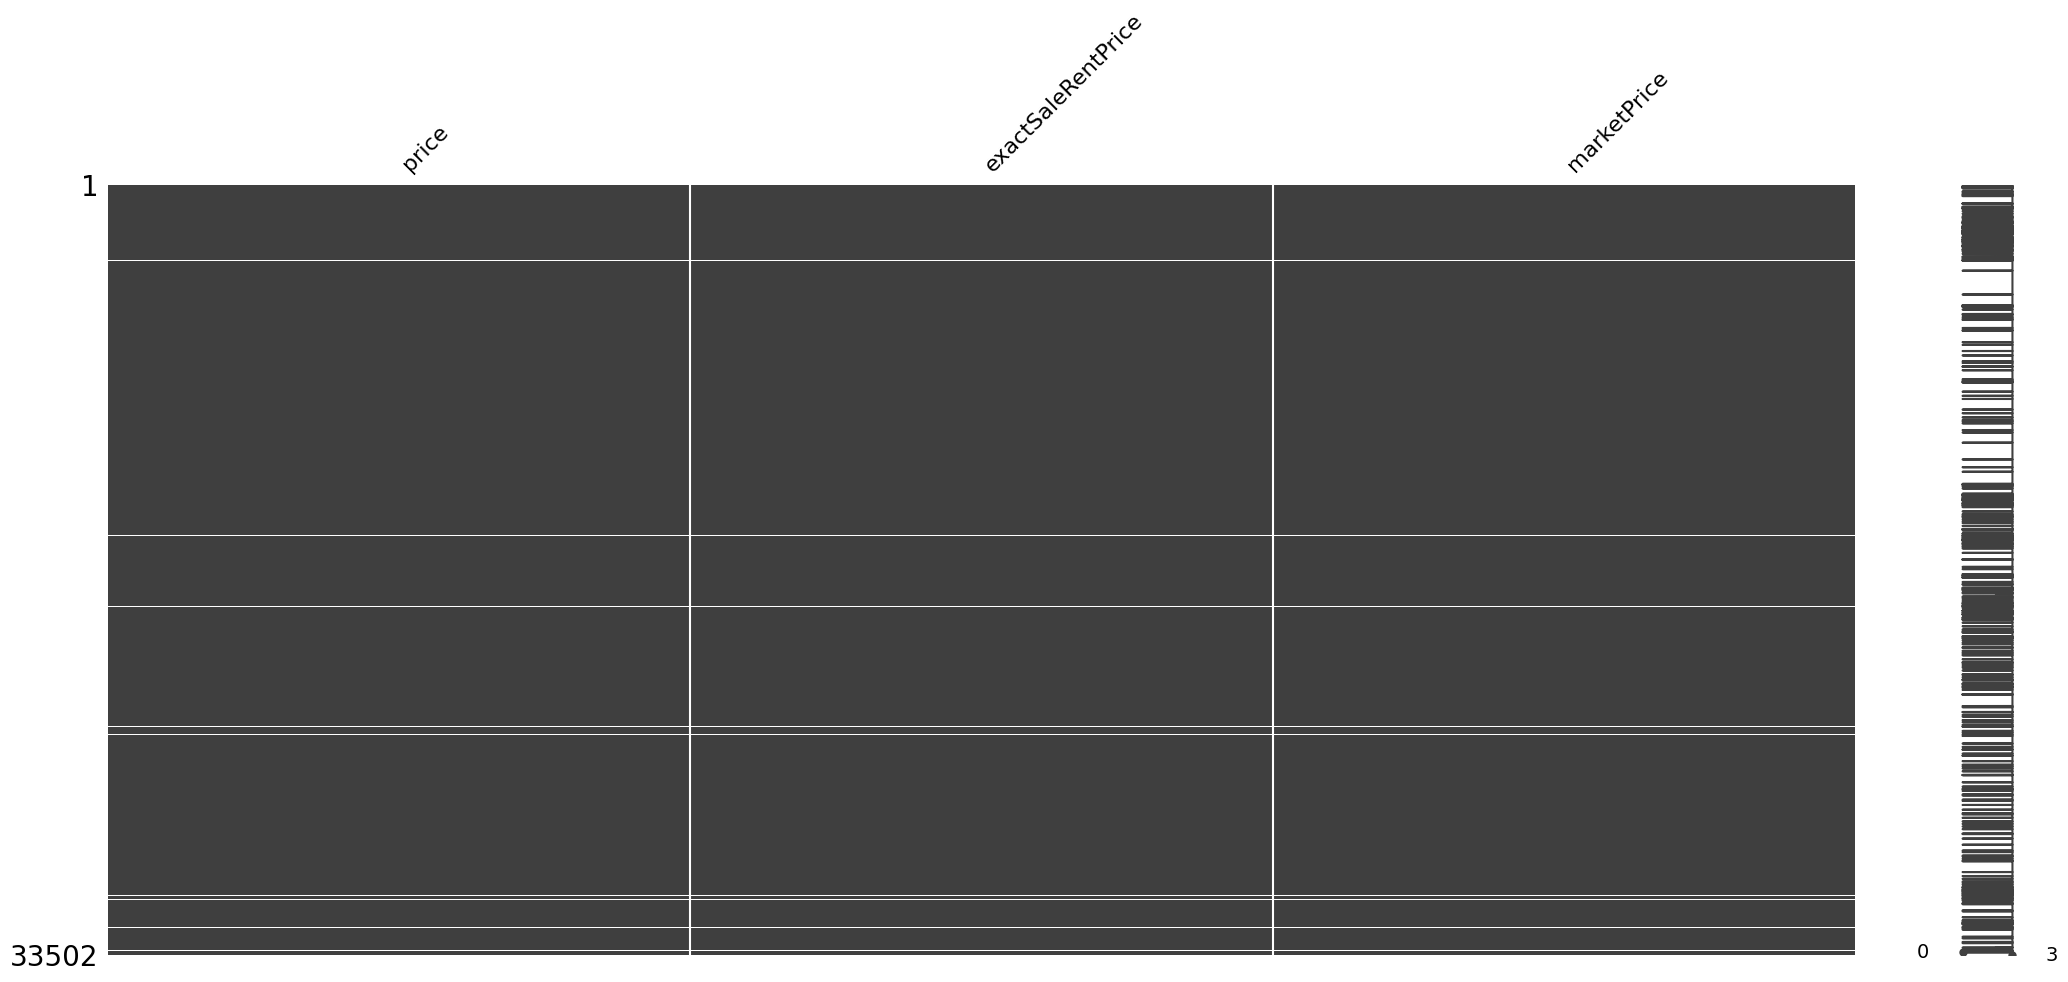

In [3]:
msno.matrix(df[['price', 'exactSaleRentPrice', 'marketPrice']])

You can see that almost all the missing values are at same indices

In [65]:
df.sort_values(by=['price'], ascending=True).head(20).to_csv('temp.csv', index=False)

In [4]:
mask1 = df['price'].isnull() | df['exactSaleRentPrice'].isnull() | df['marketPrice'].isnull()
mask2 = df['price'].isnull() & df['exactSaleRentPrice'].isnull() & df['marketPrice'].isnull()

df.loc[mask1 & ~mask2, ['price', 'exactSaleRentPrice', 'marketPrice']]

,price,exactSaleRentPrice,marketPrice
17790,13600000.0,13600000.0,NaN
33163,1900000.0,1900000.0,NaN
33323,2400000.0,2400000.0,NaN


This code was to check rows where atleast one value was NaN but not all 3. You can see that 'marketPrice' column can be dropped as it's the only column that has all NaNs where others don't.

In [48]:
df[['price', 'exactSaleRentPrice']].astype('Int64').query('price != exactSaleRentPrice').shape[0]

0

This tells that the columns 'price' and 'exactSaleRentPrice' are the same everywhere. So, we can drop 'exactSaleRentPrice'

#### Inspecting Locality columns for missing values

<Axes: >

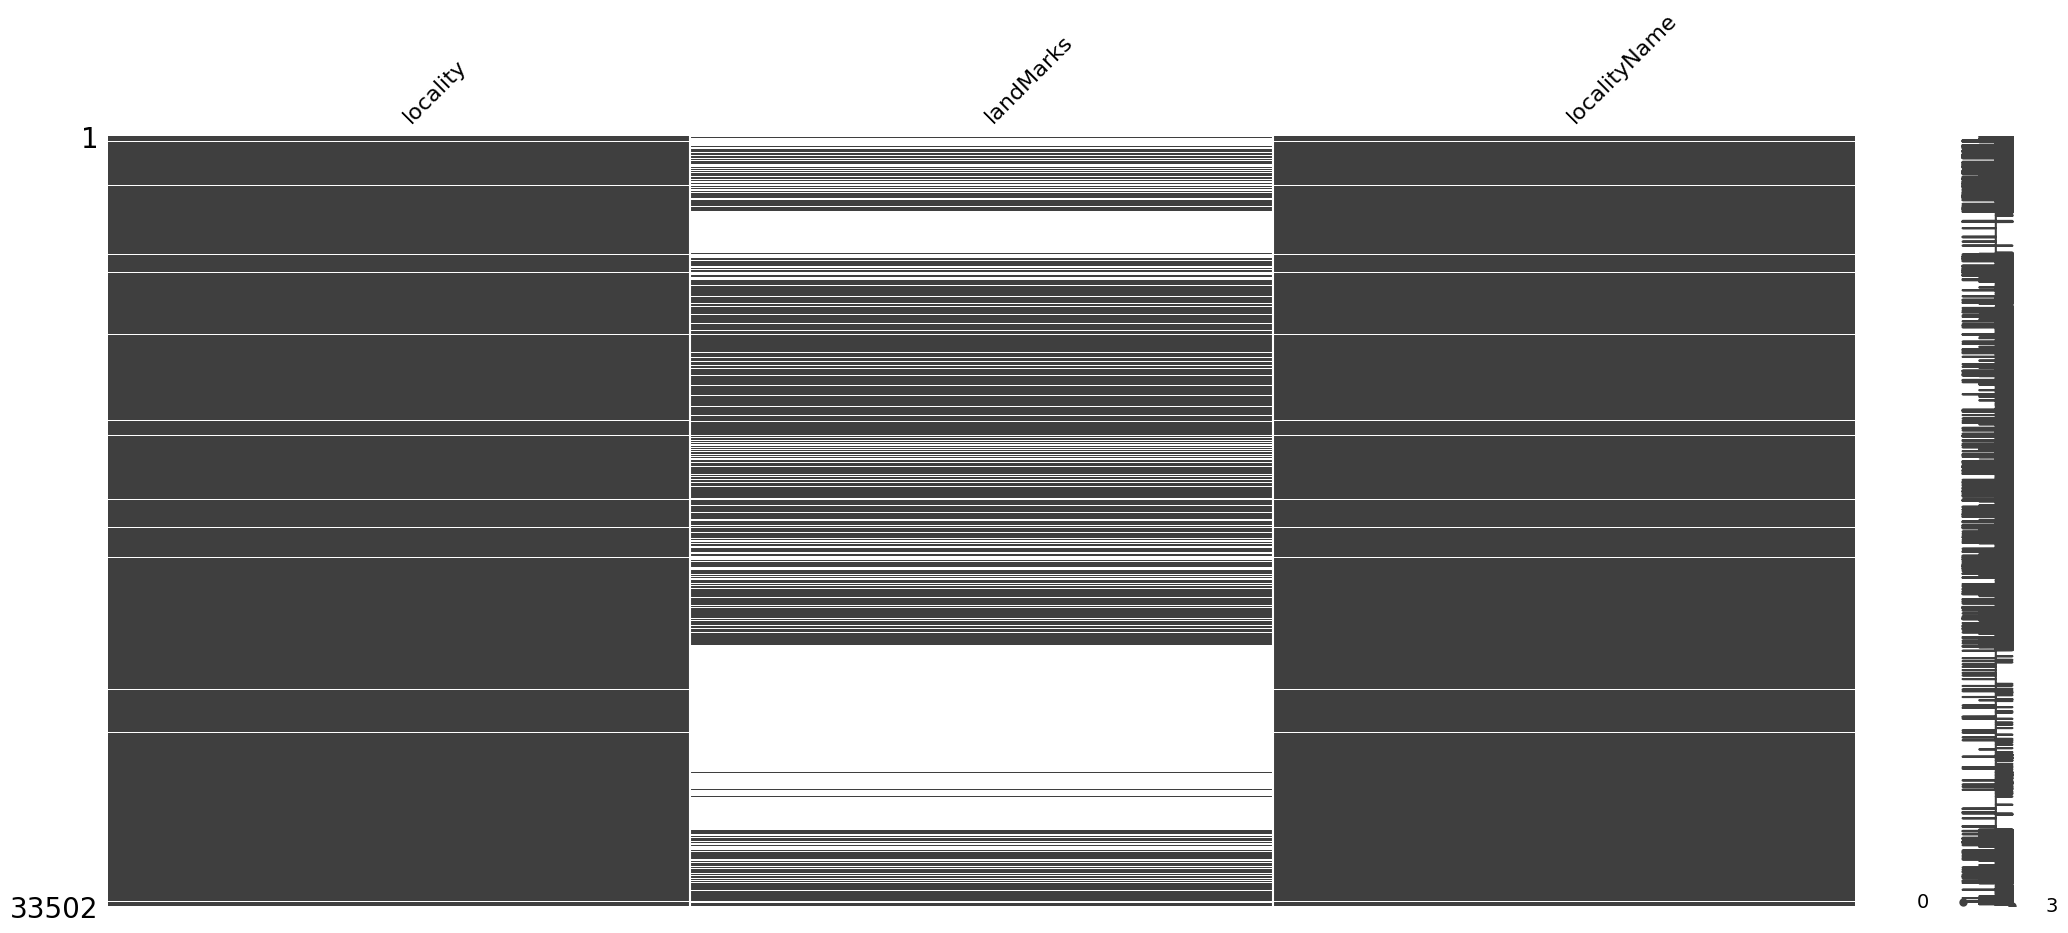

In [ ]:
msno.matrix(df[['locality', 'landMarks', 'localityName']])

Most of the data in 'landMarks' column is missing. And 'locality' and 'localityName' have almost all missing values same rows.

In [24]:
df[['locality', 'localityName']].to_csv('temp.csv', index=True)
df[['locality', 'landMarks', 'localityName']].sample(10)

,locality,landMarks,localityName
26905,Hadapsar,NaN,Hadapsar
5847,Wakad,Near to Mumbai-Bengaluru highway back side of...,Wakad
23649,Kondhwa,NaN,Kondhwa
8986,Baner,Pancard Club Road,Baner
3842,Joggers Park,NaN,Joggers Park
31357,Pan Card Club Road,The property is close to Balewadi highstreet.,Pan Card Club Road
30701,Dattanagar Ambegaon BK,NaN,Dattanagar Ambegaon BK
14132,Wagholi,NaN,Wagholi
30056,Thergaon,NaN,"Thergaon, Pimpri Chinchwad"
7273,Mundhwa,Near EON IT park,Mundhwa


The landmark column has too many missing values. Also, loaclity and localityName seem to have required data about the locality. Can drop 'landmark' column.

In [27]:
mask1 = df['locality'].isnull() | df['localityName'].isnull()
mask2 = df['locality'].isnull() & df['localityName'].isnull()

print(df.loc[mask1 & ~mask2, ['locality', 'localityName']].shape)
df.loc[mask1 & ~mask2, ['locality', 'localityName']].isnull().sum()

(67, 2)


locality         0
localityName    67
dtype: int64

This code was to check rows where atleast one value was NaN but not all 2. We can see that for those specific rows, locality column has values while localityName has all NaN. So, if only one column is to be kept, we can keep 'locality' column.

In [28]:
print(df[['locality', 'localityName']].astype(pd.StringDtype()).map(lambda x: x.strip() if pd.notnull(x) else x).query('locality != localityName').shape)
df[['locality', 'localityName']].astype(pd.StringDtype()).map(lambda x: x.strip() if pd.notnull(x) else x).query('locality != localityName').sample(10)

(11471, 2)


,locality,localityName
476,<NA>,<NA>
2958,Chikhali,Chikhali Pimpri Chinchwad
9358,<NA>,<NA>
29402,Manik Baug,"Manik Baug, Anand Nagar"
12781,Punawale,"Punawale, Pimpri Chinchwad"
13136,Bhonde Colony,"Bhonde Colony, Erandwane, Karve Road"
31136,<NA>,<NA>
26469,Charholi Budruk,Charholi BK
17332,Magarpatta City,Magarpatta
28921,Manaji Nagar,Manaji Nagar Narhe


There are 11471 rows where locality and localityName aren't the same.

#### Inspecting nameOfSociety and projectName

<Axes: >

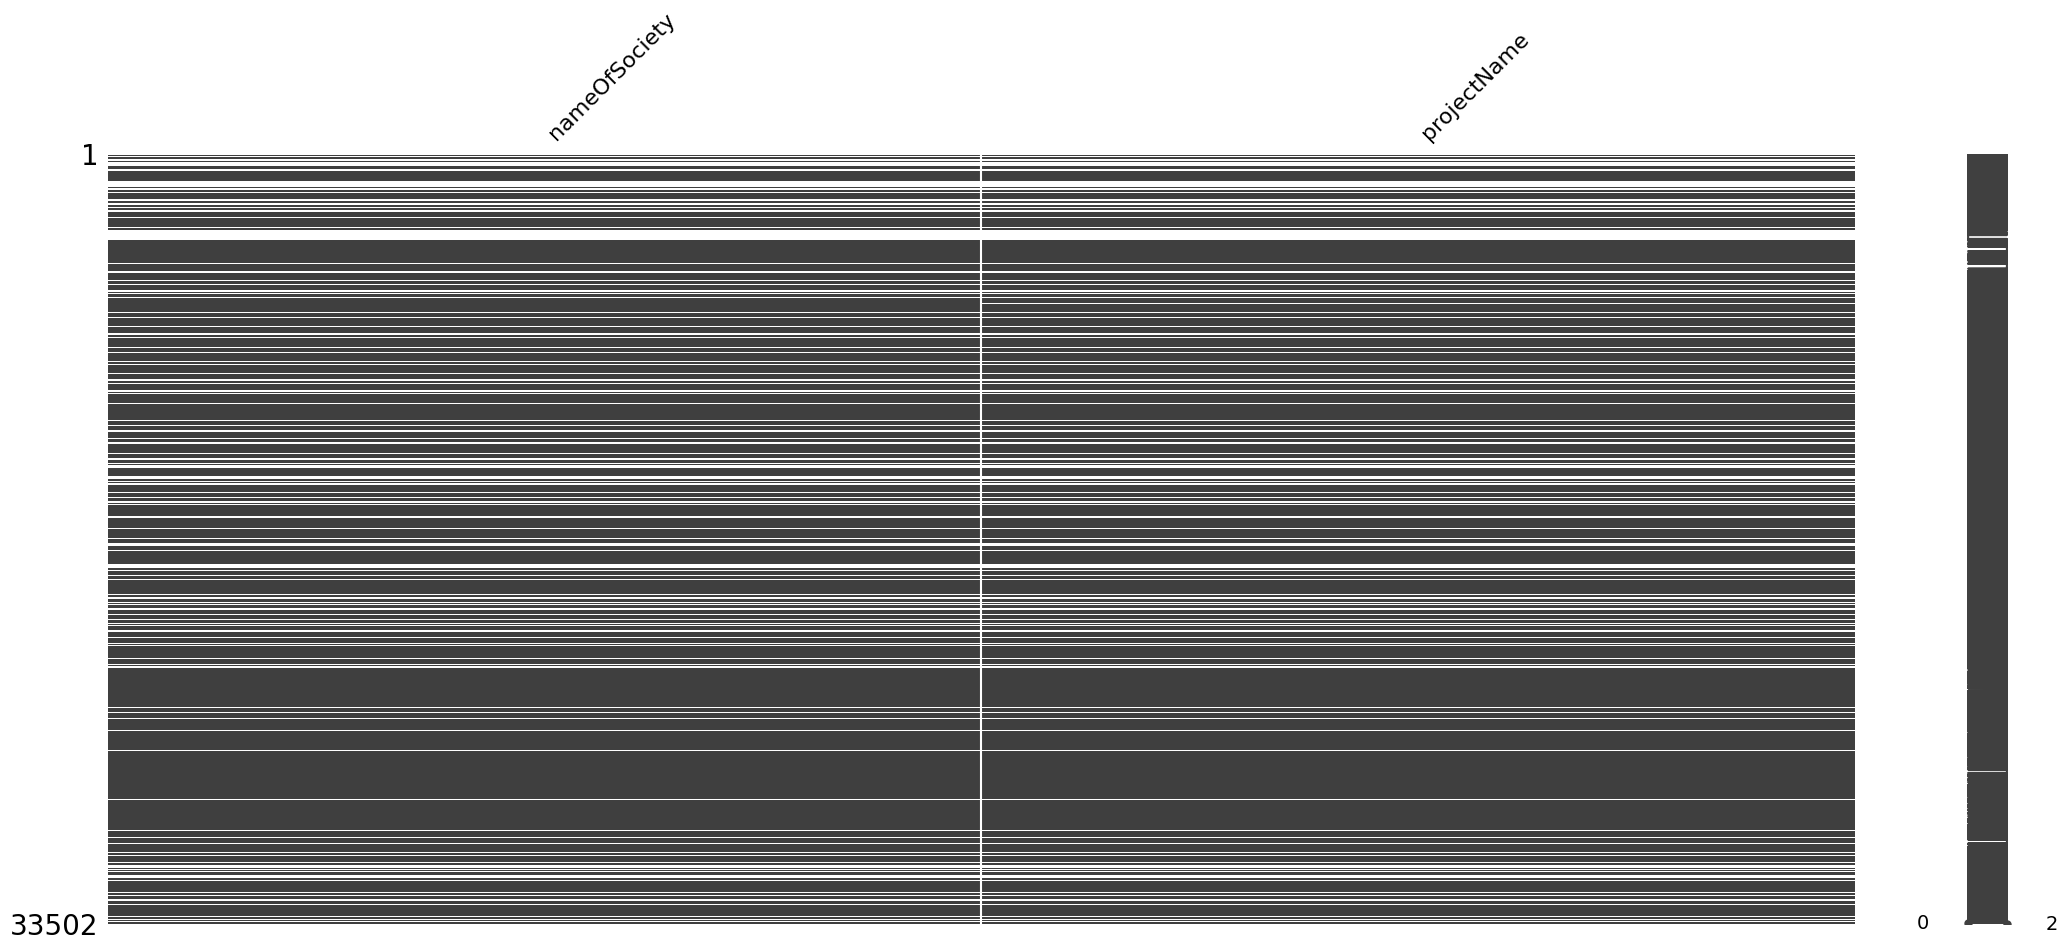

In [30]:
msno.matrix(df[['nameOfSociety', 'projectName']])

In [37]:
mask1 = df['nameOfSociety'].isnull() | df['projectName'].isnull()
mask2 = df['nameOfSociety'].isnull() | df['projectName'].isnull()

print(df.loc[mask1 & ~mask2, ['nameOfSociety', 'projectName']].shape)
df[['nameOfSociety', 'projectName']].map(lambda x: x.strip().title() if pd.notnull(x) else x).dropna().query('nameOfSociety != projectName')

(0, 2)


,nameOfSociety,projectName
39,Vignahar Apartments,Vighnahar Krupa Apartment
65,Kumar Prerna,Kumar Prerana
82,Rajveer App,Rajveer Apartment
104,Moraya Basil.,Moraya Darshan
109,Shree Samarth Sankul,Shree Swami Samarth Sankul Apartment
...,...,...
33222,Shiv Angan,Ace Almighty
33273,Kohinoor S3 Lifestyle,Mirchandani Palms
33412,Yuthika,Paranjape Yuthika
33458,Rohan Tarang,Latitude


#### Inspecting area columns

In [34]:
df['coveredArea'].astype(pd.StringDtype()).str.replace(',', '', regex=False).str.removesuffix('.0').astype(pd.Int64Dtype())

0        1750
1        1720
2        1100
3        1255
4        3245
         ... 
33497     950
33498    1000
33499     700
33500     818
33501     645
Name: coveredArea, Length: 33502, dtype: Int64

#### Inspecting miscellaneous data

In [72]:
df['possessionStatus'].astype(pd.StringDtype()).str.title().unique()

<StringArray>
['Ready To Move', 'Immediately', <NA>, 'Under Construction']
Length: 4, dtype: string

In [86]:
df['developerName'].astype(pd.StringDtype()).str.strip().str.title().value_counts().describe()

count       2295.0
mean     10.118954
std      35.589496
min            1.0
25%            1.0
50%            3.0
75%            7.0
max          717.0
Name: count, dtype: Float64

In [247]:
srs = df['flooringType'].astype(pd.StringDtype()).str.strip().str.split(', ')

li = []
for items in srs:
    if type(items) is list:
        for item in items:
            li.append(item) if item not in li else None

print(li)

['Vitrified', 'Ceramic Tiles', 'Marble', 'Normal Tiles/Kotah Stone', 'Granite', 'Wooden', 'Mosaic', 'Marbonite']


In [102]:
df['floorNumber'].astype(pd.StringDtype()).unique()

<StringArray>
[             '1',             '13',              '2',             <NA>,
             '21',             '29',              '4',              '3',
              '6',              '5',             '11',              '8',
              '7',         'Ground',              '9',             '10',
             '14',             '12',             '15', 'Upper Basement',
             '16',             '24',             '34', 'Lower Basement',
             '20',             '18',             '22',             '19',
             '23',             '27',             '25',             '17',
             '28',             '37',             '40',             '33',
             '30',             '31',             '32',             '26',
             '38',             '39']
Length: 42, dtype: string

In [106]:
df.loc[df['floorNumber'] == 'Lower Basement', ['locality', 'price', 'nameOfSociety', 'developerName', 'floorNumber']]

,locality,price,nameOfSociety,developerName,floorNumber
644,Shivajinagar,15000000.0,NaN,NaN,Lower Basement
646,Pimple Gurav,3000000.0,NaN,NaN,Lower Basement
1374,Narhe,3500000.0,Shivam Heights,Shyam Nandan Group,Lower Basement
1455,Tathawade,10100000.0,Austin Arena,Gravity Landmarks,Lower Basement
1471,Pimpri Chinchwad,2100000.0,Daya Apartment,NaN,Lower Basement
...,...,...,...,...,...
31547,Ravet,9700000.0,Shubharambh Clara,Shubharambh properties,Lower Basement
31558,Punawale,6500000.0,Rudraksh,Shree Bhagwati Builders,Lower Basement
31751,Punawale,4700000.0,NaN,NaN,Lower Basement
33238,EON Free Zone,38400000.0,Bramha the Collection,Bramhacorp Ltd.,Lower Basement


In [109]:
df['unitCountonFloor'].astype('Int64').unique()

<IntegerArray>
[<NA>,    4,    3,    7,    2,    1,    5,    8,    6,   12,  704,   32,   10,
   14,   24,   11,  402,  701,    9,   18,  101,   13,   22,  801,   16,  107,
   20,   15,   35,  509,   28,  307,   25,  502,   17,  200,  508,   36,   48,
   19,   26,   30,   21,   40,   23,  240,  204,   56,  503,  103,  203,  100,
  104,  303,  112,  505,  501,   50,   80,  302,   84,  404,  804,   69]
Length: 64, dtype: Int64

In [111]:
df['totalFloorNumber'].astype('Int64').unique()

<IntegerArray>
[   4,   30,    6,   12,   25,   11,   10,    9,    5,    3,    2,    8,    7,
 <NA>,   15,   24,   13,   14,   22,    1,   26,   16,   21,   34,   18,   19,
   20,   23,   17,   29,   27,   32,   35,   28,   31,   33,   39,   37,   36,
   45,   42,   40,   75,   38,   43,   41,   46,   77,   80,   74,   44,  200,
  101]
Length: 53, dtype: Int64

In [116]:
df['electricityStatus'].unique()

array([nan, 'No/Rare Powercut', 'Less Than 2 Hour Powercut',
       '4 To 6 Hours Powercut', 'Over 6 Hours Powercut',
       '2 To 4 Hours Powercut'], dtype=object)

In [119]:
df['waterStatus'].value_counts()

waterStatus
24 Hours Available    15697
12 Hours Available       37
6 Hours Available        11
2 Hours Available         9
1 Hour Available          5
Name: count, dtype: int64

In [122]:
df['latitude'].astype(pd.Float64Dtype()).describe()

count      32929.0
mean     18.562862
std       0.549802
min       8.517944
25%      18.501097
50%      18.552719
75%      18.598592
max      73.825241
Name: latitude, dtype: Float64

In [123]:
df['transactionType'].unique()

array(['Resale', 'New Property', 'Rent', nan, 'Other'], dtype=object)

In [124]:
df['facing'].unique()

array(['East', nan, 'West', 'North', 'North - East', 'South -West',
       'South', 'South - East', 'North - West'], dtype=object)

In [125]:
df['ownershipType'].unique()

array(['Freehold', 'Leasehold', 'Co-operative Society', nan,
       'Power Of Attorney'], dtype=object)

In [126]:
df['carParking'].unique()

array([nan, '1 Covered', '2 Covered', '1 Covered, 1 Open', '4 Covered',
       '3 Covered', '1 Open', '9 Covered', '5 Open', '25 Open', '7 Open',
       '9 Open', '40 Open', '5 Covered', '401 Covered', '206 Open',
       '45 Open', '505 Covered', '2 Open', '501 Covered', '703 Open',
       '702 Covered', '207 Open', '6 Covered', '2 Covered, 1 Open',
       '3 Covered, 1 Open', '15 Open', '201 Covered', '10 Open',
       '1 Covered, 3 Open', '904 Covered', '5 Covered, 11 Open',
       '20 Covered', '22 Covered', '5 Covered, 5 Open', '44 Covered',
       '34 Covered', '17 Covered, 11 Open', '15 Covered, 5 Open',
       '15 Covered, 15 Open', '4 Covered, 4 Open', '11 Covered, 11 Open',
       '120 Covered, 20 Open', '30 Covered, 15 Open',
       '10 Covered, 5 Open', '27 Covered, 13 Open', '28 Covered, 12 Open',
       '10 Covered, 12 Open', '20 Covered, 8 Open', '22 Covered, 5 Open',
       '25 Covered, 15 Open', '10 Covered, 15 Open', '20 Covered, 5 Open',
       '18 Covered, 12 Open', 

In [14]:
srs = df['carParking'].astype(pd.StringDtype()).dropna()

def extract_parking(val: str) -> pd.Series:
    srs = pd.Series(index=['carParking_Open', 'carParking_Covered'], data=[pd.NA, pd.NA], dtype=pd.Int64Dtype())
    if pd.isna(val):
        srs['carParking_Open'] = pd.NA
        srs['carParking_Covered'] = pd.NA
        return srs
    open_parking = pd.NA
    close_parking = pd.NA
    if len(val.split(', ')) == 1:
        if 'Open' in val:
            open_parking = int(val.removesuffix(' Open'))
        elif 'Covered' in val:
            close_parking = int(val.removesuffix(' Covered'))
    else:
        open_parking = int(re.search(r'(\d*) Open$', val).group(1))
        close_parking = int(re.search(r'^(\d*) Covered', val).group(1))
    srs['carParking_Open'] = open_parking
    srs['carParking_Covered'] = close_parking
    return srs

# def extract_parking(srs: pd.Series) -> pd.Series:
#     val = srs['carParking']
#     if pd.isna(val):
#         srs['carParking_Open'] = pd.NA
#         srs['carParking_Covered'] = pd.NA
#         return srs
#     open_parking = 0
#     close_parking = 0
#     if len(val.split(', ')) == 1:
#         if 'Open' in val:
#             open_parking = int(val.removesuffix(' Open'))
#         elif 'Covered' in val:
#             close_parking = int(val.removesuffix(' Covered'))
#     else:
#         open_parking = int(re.search(r'(\d*) Open$', val).group(1))
#         close_parking = int(re.search(r'^(\d*) Covered', val).group(1))
#     srs['carParking_Open'] = open_parking
#     srs['carParking_Covered'] = close_parking
#     return srs

df['carParking'].apply(extract_parking)


,carParking_Open,carParking_Covered
0,NaN,NaN
1,0.0,1.0
2,NaN,NaN
3,NaN,NaN
4,0.0,2.0
...,...,...
33497,0.0,1.0
33498,1.0,0.0
33499,0.0,1.0
33500,NaN,NaN


<Axes: >

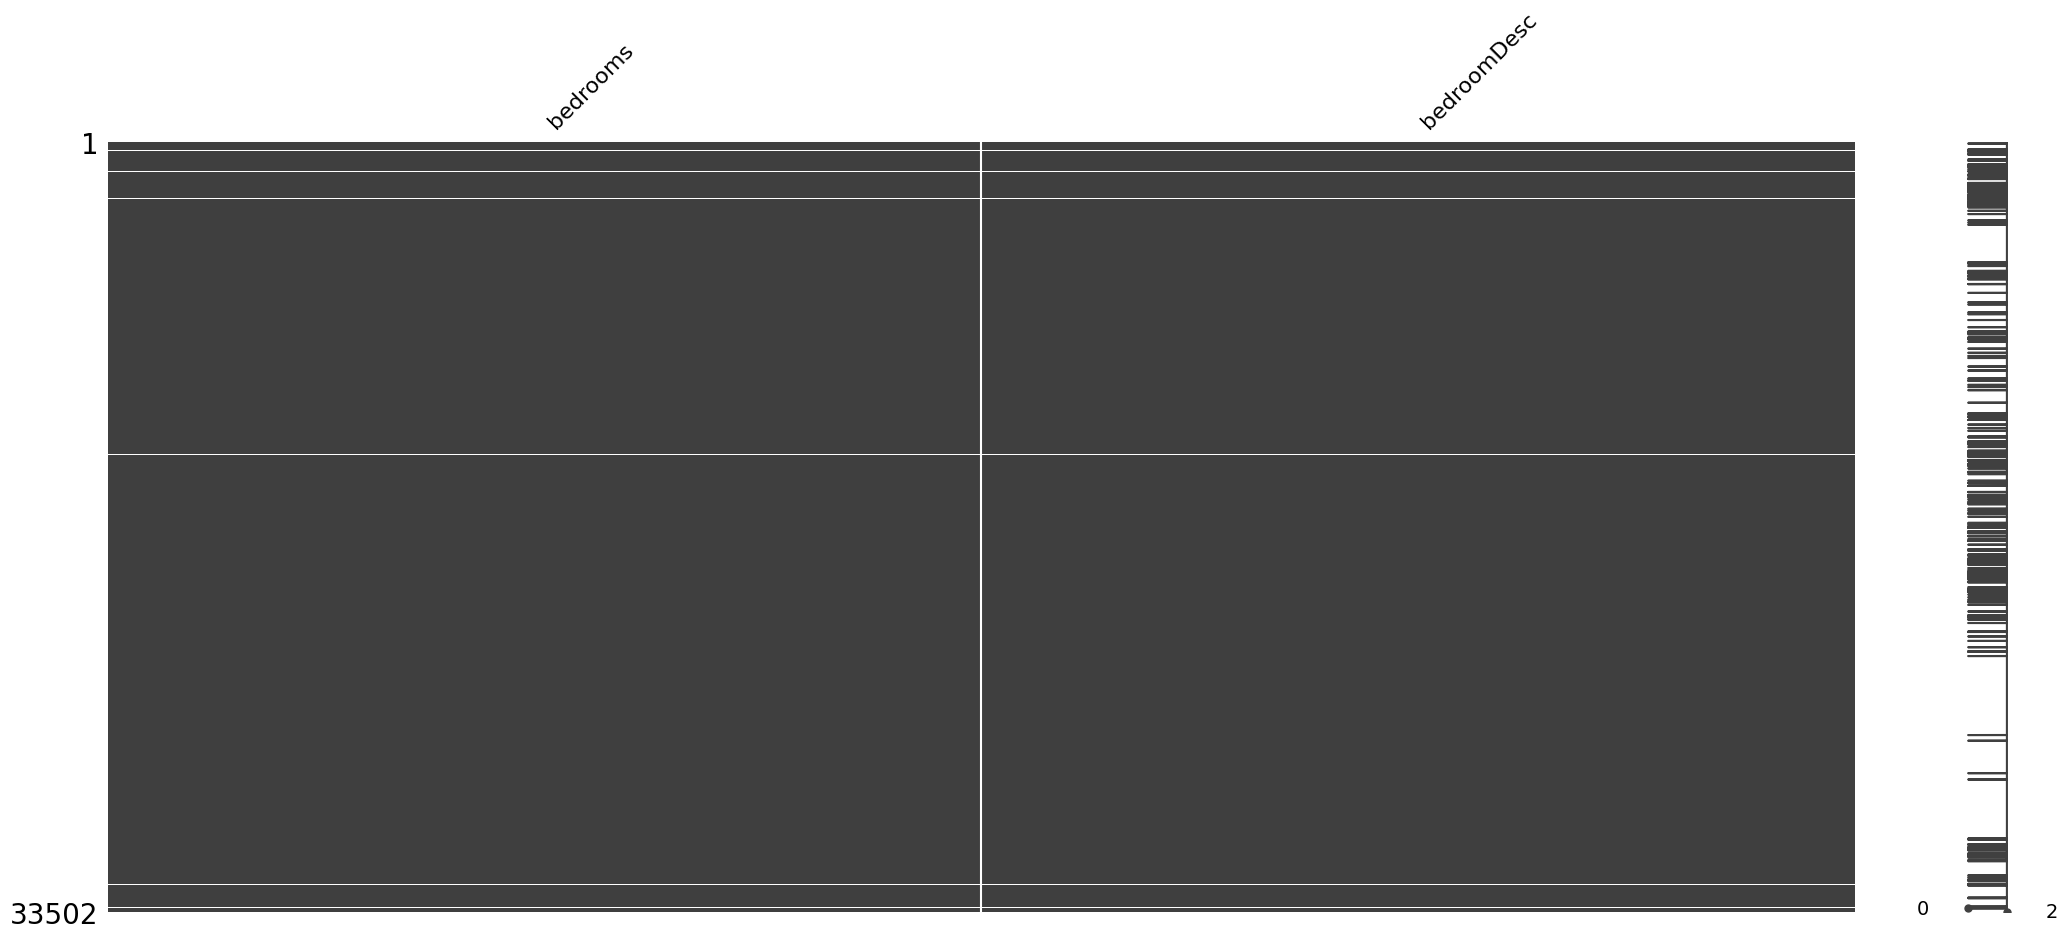

In [131]:
msno.matrix(df[['bedrooms', 'bedroomDesc']])

In [174]:
temp = df[['bedrooms', 'bedroomDesc']].dropna(how='all').astype(pd.StringDtype())
temp['bedrooms'] = temp['bedrooms'].str.replace('> 10', '20')
temp['bedroomDesc'] = temp['bedroomDesc'].str.replace('10-plus', '20')
temp[['bedrooms', 'bedroomDesc']] = temp[['bedrooms', 'bedroomDesc']].astype(pd.Float32Dtype()).astype(pd.Int32Dtype())

In [177]:
temp.query('bedrooms != bedroomDesc').shape[0]

0

In [184]:
df['bedroomDesc'].astype(pd.StringDtype()).str.strip().str.removesuffix('.0').str.replace('> 10', 'More than 10').unique()

<StringArray>
['4', '3', '2', '5', '1', <NA>, '8', '10-plus', '7', '6', '10']
Length: 11, dtype: string

In [194]:
df['numberOfBalconiedDesc'].unique()

array([nan, '2', '1', '3', '5', '4', '10', '6', '10-plus', '7', '8', '9',
       1.0, 2.0, 3.0, 4.0, 5.0], dtype=object)

In [191]:
temp = df[['numberOfBalconied', 'numberOfBalconiedDesc']].dropna(how='all').astype(pd.StringDtype())
temp['numberOfBalconied'] = temp['numberOfBalconied'].str.replace('> 10', '20')
temp['numberOfBalconiedDesc'] = temp['numberOfBalconiedDesc'].str.replace('10-plus', '20')
temp[['numberOfBalconied', 'numberOfBalconiedDesc']] = temp[['numberOfBalconied', 'numberOfBalconiedDesc']].astype(pd.Float32Dtype()).astype(pd.Int32Dtype())

In [192]:
temp.query('numberOfBalconied != numberOfBalconiedDesc').shape[0]

0

In [196]:
df['propertyType'].unique()

array(['Multistorey Apartment', 'Builder Floor Apartment', 'Penthouse',
       'Studio Apartment'], dtype=object)

In [22]:
df['additionalRooms'][0]

'Puja Room, Study, Store'

In [246]:
li = []
srs = df['additionalRooms'].astype(pd.StringDtype()).str.strip('[] ')
srs = srs.str.replace("'", "")
srs = srs.str.split(', ')

for items in srs:
    if type(items) is list:
        for item in items:
            li.append(item) if item not in li else None

li

['Puja Room', 'Study', 'Store', 'None of these', 'Servant Room']

In [261]:

def transform_additionalRooms_and_flooringType(df: pd.DataFrame) -> pd.DataFrame:
    # Make a copy so we don't modify the original dataframe
    df_new = df.copy()

    # Define the parsing function
    def parse_list_string(s):
        if pd.isna(s):
            return pd.NA
        s = s.strip("[] ")
        if not s:
            return pd.NA
        items = [x.strip().strip("'") for x in s.split(",") if x.strip() != ""]
        return items if len(items) > 0 else pd.NA

    # Parse the columns
    df_new['flooringType_parsed'] = df_new['flooringType'].apply(parse_list_string)
    df_new['additionalRooms_parsed'] = df_new['additionalRooms'].apply(parse_list_string)

    # Unique categories
    flooring_cats = [
        'Vitrified', 'Ceramic Tiles', 'Marble', 'Normal Tiles/Kotah Stone',
        'Granite', 'Wooden', 'Mosaic', 'Marbonite'
    ]
    add_rooms_cats = ['Puja Room', 'Study', 'Store', 'Servant Room']
    # (We exclude 'None of these' from the columns)

    # Create new columns for flooringType
    for cat in flooring_cats:
        col_name = f"flooringType_{cat.replace(' ', '').replace('/', '')}"
        df_new[col_name] = pd.Series(dtype="boolean")  # nullable boolean column
        for i, vals in df_new['flooringType_parsed'].items():
            if vals is pd.NA:
                df_new.loc[i, col_name] = pd.NA
            else:
                df_new.loc[i, col_name] = (cat in vals)


    # Create new columns for additionalRooms
    for cat in add_rooms_cats:
        col_name = f"additionalRoom_{cat.replace(' ', '')}"
        df_new[col_name] = pd.Series(dtype="boolean")
        for i, vals in df_new['additionalRooms_parsed'].items():
            if vals is pd.NA:
                df_new.loc[i, col_name] = pd.NA
            else:
                if vals == ['None of these']:
                    df_new.loc[i, col_name] = False
                else:
                    df_new.loc[i, col_name] = (cat in vals)


    # Optionally, drop the parsed columns if not needed
    df_new = df_new.drop(columns=['flooringType_parsed', 'additionalRooms_parsed'])

    return df_new

tempdf = transform_additionalRooms_and_flooringType(df)


In [285]:
tempdf[['flooringType'] + tempdf.columns.to_list()[-12:-4] + ['additionalRooms'] + tempdf.columns.to_list()[-4:]].to_csv('temp.csv', index=False)

In [ ]:
df['bookingAmountExact'].astype('Int64')

count           17607.0
mean      400021.429999
std      1136067.998644
min                 0.0
25%            100000.0
50%            200000.0
75%            500000.0
max          54000000.0
Name: bookingAmountExact, dtype: Float64

In [314]:
df['maintenanceCharges'].dropna().loc[df['maintenanceCharges'].dropna().astype(pd.StringDtype()).str.replace(',', '').str.contains(r'\W', regex=True)]

853      15.0 Lac
1469      3.0 Lac
1527      8.0 Lac
1679      1.8 Lac
1760      1.3 Lac
           ...   
33312     1.0 Lac
33316     1.0 Lac
33318     1.0 Lac
33320     1.0 Lac
33322     1.0 Lac
Name: maintenanceCharges, Length: 110, dtype: object

In [310]:
df['maintenanceCharges'].dropna().astype(pd.StringDtype()).str.replace(',', '').str.replace(r'\.\d Lac', '', regex=True).astype('Int64')

1         7200
4        11375
7         7500
11        7500
13       10000
         ...  
33494     3500
33496        1
33497        1
33498        3
33499        3
Name: maintenanceCharges, Length: 12162, dtype: Int64

In [312]:
df['ageofcons'].unique()

array(['15 to 20 years', 'Less than 5 years', nan, 'New Construction',
       '5 to 10 years', '10 to 15 years', 'Above 20 years',
       'Under Construction'], dtype=object)

In [313]:
df['isVerified'].unique()

array(['N', 'Y', 'O', nan], dtype=object)

In [321]:
df['listingTypeDesc'].astype(pd.StringDtype()).str.replace(' Listing| Listings', '', regex=True).str.replace('Primes', 'Prime').unique()

<StringArray>
['Standard', 'Prime', 'Titanium', 'Certified', 'Platinum', 'Premium']
Length: 6, dtype: string

In [323]:
df['premiumProperty']

0        False
1         True
2         True
3        False
4         True
         ...  
33497     True
33498     True
33499     True
33500    False
33501    False
Name: premiumProperty, Length: 33502, dtype: bool

In [326]:
df['noOfLifts'].astype('Int32')

0        <NA>
1           3
2           2
3        <NA>
4           3
         ... 
33497       2
33498       2
33499       2
33500    <NA>
33501    <NA>
Name: noOfLifts, Length: 33502, dtype: Int32

In [341]:
srs = df['facilitiesDesc'].astype(pd.StringDtype()).str.split(', ')

li = {}

for items in srs:
    if type(items) is list:
        for item in items:
            if li.get(item) is None:
                li[item] = 1
            else:
                li[item] += 1

print(len(li))
pd.Series(li).sort_values(ascending=False).to_csv('temp.csv')

157


In [43]:
import json
json.loads(df['propertyAmenities'].astype(pd.StringDtype()).str.replace("'", '"')[0])

{'12202': 'Lift',
 '12204': 'Club House',
 '12205': 'Swimming Pool',
 '12206': 'Gymnasium',
 '12207': 'Park',
 '12208': 'Reserved Parking',
 '12209': 'Security',
 '12213': 'Vaastu Compliant',
 '12217': 'Intercom Facility',
 '12219': 'Waste Disposal',
 '12221': 'Internet/Wi-Fi Connectivity',
 '12226': 'Cafeteria/Food Court'}

### Cleaning ToDo

1. For per sq ft price, check if price/carpetArea and price/coveredArea match the respective column values
2. There are a few features which are represented by multiple columns. For example; price, landmark/locality and society/project name have multiple columns. So, check their values for multiple sample rows and keep only the best one for further analysis.
3. In carParking, the text may contain values like "2 Open". We need to extract those relevant details
4. Estimating carpetArea from coveredArea

['localityNameMerge_v1.json',
 'localityNameMerge_v2.json',
 'localityNameMerge_v3.json',
 'localityNameMerge_v4.json',
 'localityNameMerge_v5.json']

## Final Cleaning

In [16]:
import pandas as pd
import re
import json
import os

df = pd.read_csv('Data/rawExtractedPropertyDetails.csv')

# localityNameMerge = {}

# localityNameMerge_items = [item for item in os.listdir('./LocalitiesMerge/') if item.endswith('.json') and 'localityNameMerge_v' in item]
# for key in localityNameMerge_items:
#     with open(f"./LocalitiesMerge/{key}", 'r') as f:
#         localityNameMerge[key.rstrip('.json')] = json.load(f)


C:\Users\bhagy\AppData\Local\Temp\ipykernel_7612\869631796.py:6: DtypeWarning: Columns (34,35) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv('Data/rawExtractedPropertyDetails.csv')


In [ ]:
def clean_string_col(series: pd.Series) -> pd.Series:
    # Helper function to clean strings: strip, collapse spaces, remove weird chars if needed
    series = series.astype(pd.StringDtype())
    series = series.str.strip()
    # Replace multiple spaces with a single space
    series = series.str.replace(r'\s+', ' ', regex=True)
    # If needed, remove weird/unicode chars (example, remove non-printable)
    series = series.str.replace(r'[^\x00-\x7F]+', '', regex=True)
    # series = series.str.title()
    return series

def clean_numeric_with_commas(series: pd.Series) -> pd.Series:
    series = series.astype(pd.StringDtype())
    series = series.str.replace(',', '', regex=False)
    series = series.str.removesuffix('.0')
    return series.astype(pd.Int64Dtype())

def clean_bed_bath_balcony(series: pd.Series) -> pd.Series:
    series = series.astype(pd.StringDtype()).str.strip()
    # Remove suffix '.0'
    series = series.str.replace(r'\.0$', '', regex=True)
    # Replace '> 10' and '10-plus' with 'More than 10'
    series = series.str.replace(r'>\s?10', 'More than 10', regex=True)
    series = series.str.replace('10-plus', 'More than 10', regex=False)
    return series

def clean_maintenance_charges(series: pd.Series) -> pd.Series:
    # Convert to string and remove commas
    series = series.astype(pd.StringDtype())
    series = series.str.replace(',', '', regex=False)
    # Identify and handle 'Lac'
    lac_mask = series.str.contains('Lac', na=False)
    # For Lac values, remove ' Lac', remove '.', then add '0000'
    series_lac = series[lac_mask].str.replace(' Lac', '', regex=False)
    series_lac = series_lac.str.replace('.', '', regex=False)
    series_lac = series_lac + '0000'
    series.loc[lac_mask] = series_lac
    # Identify and handle 'Cr'
    cr_mask = series.str.contains('Cr', na=False)
    # For Lac values, remove ' Lac', remove '.', then add '0000'
    series_cr = series[cr_mask].str.replace(' Cr', '', regex=False)
    series_cr = series_cr.str.replace('.', '', regex=False)
    series_cr = series_cr + '00000'
    series.loc[cr_mask] = series_cr
    # Convert everything to int
    return series.astype(pd.Int64Dtype())

def clean_listing_type(series: pd.Series) -> pd.Series:
    series = series.astype(pd.StringDtype())
    series = series.str.replace(r' Listings?', '', regex=True)
    series = series.str.replace('Primes', 'Prime', regex=False)
    return series.astype('category')

def clean_isVerified(series: pd.Series) -> pd.Series:
    mapping = {'Y': 'Yes', 'N': 'No', 'O': 'Other'}
    return series.replace(mapping).astype(pd.CategoricalDtype())

def transform_additionalRooms_and_flooringType(df: pd.DataFrame) -> pd.DataFrame:
    # Make a copy so we don't modify the original dataframe
    df_new = df.copy()

    # Define the parsing function
    def parse_list_string(s: str) -> list:
        if pd.isna(s):
            return pd.NA
        s = s.strip("[] ")
        s = re.sub(r'\W+', '', s)
        if not s:
            return pd.NA
        items = [x.strip().strip("'") for x in s.split(",") if x.strip() != ""]
        return items if len(items) > 0 else pd.NA

    # Parse the columns
    df_new['flooringType_parsed'] = df_new['flooringType'].apply(parse_list_string)
    df_new['additionalRooms_parsed'] = df_new['additionalRooms'].apply(parse_list_string)

    # Unique categories
    flooring_cats = [
        'Vitrified', 'Ceramic Tiles', 'Marble', 'Normal Tiles/Kotah Stone',
        'Granite', 'Wooden', 'Mosaic', 'Marbonite'
    ]
    add_rooms_cats = ['Puja Room', 'Study', 'Store', 'Servant Room']
    # (We exclude 'None of these' from the columns)

    # Create new columns for flooringType
    for cat in flooring_cats:
        col_name = f"flooringType_{cat.replace(' ', '').replace('/', '')}"
        df_new[col_name] = pd.Series(dtype="boolean")  # nullable boolean column
        for i, vals in df_new['flooringType_parsed'].items():
            if vals is pd.NA:
                df_new.loc[i, col_name] = pd.NA
            else:
                df_new.loc[i, col_name] = (cat in vals)


    # Create new columns for additionalRooms
    for cat in add_rooms_cats:
        col_name = f"additionalRoom_{cat.replace(' ', '')}"
        df_new[col_name] = pd.Series(dtype="boolean")
        for i, vals in df_new['additionalRooms_parsed'].items():
            if vals is pd.NA:
                df_new.loc[i, col_name] = pd.NA
            else:
                if vals == ['None of these']:
                    df_new.loc[i, col_name] = False
                else:
                    df_new.loc[i, col_name] = (cat in vals)


    # Optionally, drop the parsed columns if not needed
    df_new = df_new.drop(columns=['flooringType_parsed', 'additionalRooms_parsed'])

    return df_new

def extract_parking(srs: pd.Series) -> pd.Series:
    val = srs['carParking']
    srs = srs.drop(labels=['carParking'])
    if pd.isna(val):
        srs['carParking_Open'] = pd.NA
        srs['carParking_Covered'] = pd.NA
        return srs
    open_parking = pd.NA
    close_parking = pd.NA
    if len(val.split(', ')) == 1:
        if 'Open' in val:
            open_parking = int(val.removesuffix(' Open'))
            close_parking = 0
        elif 'Covered' in val:
            close_parking = int(val.removesuffix(' Covered'))
            open_parking = 0
    else:
        open_parking = int(re.search(r'(\d*) Open$', val).group(1))
        close_parking = int(re.search(r'^(\d*) Covered', val).group(1))
    srs['carParking_Open'] = open_parking
    srs['carParking_Covered'] = close_parking
    return srs
    

def extract_propertyAmenities(df: pd.DataFrame) -> pd.DataFrame:
    # Make a copy so we don't modify the original dataframe
    df_new = df.copy()

    # Define the parsing function
    def parse_list_string(s: str) -> list:
        if pd.isna(s):
            return pd.NA
        s = s.strip("[] ")
        if not s:
            return pd.NA
        items = [re.sub(r'\W+', '', x.strip().strip("'")) 
                 for x in s.split(",") if x.strip() != ""]
        return items if len(items) > 0 else pd.NA

    # Parse the columns
    df_new['amenities_parsed'] = df_new['facilitiesDesc'].apply(parse_list_string)

    # Explode
    df_exploded = df_new[['propertyId', 'amenities_parsed']].explode('amenities_parsed')
    df_exploded = df_exploded.dropna(subset=['amenities_parsed'])

    # Mark presence
    df_exploded['val'] = True

    # Pivot to get Boolean columns
    amenities_pivot = df_exploded.pivot_table(index='propertyId',
                                             columns='amenities_parsed',
                                             values='val',
                                             fill_value=False)
    amenities_pivot = amenities_pivot.astype(bool)

    return amenities_pivot

def clean_dataset(df: pd.DataFrame) -> pd.DataFrame:

    df['propertyId'] = df['propertyId'].astype(pd.StringDtype())
    df['url'] = df['url'].astype(pd.StringDtype()).str.strip()

    # A) Drop columns
    df = df.drop(columns=['minPrice', 'maxPrice', 'carParkingCoWo', 'bikeParkingCoWo', 'bathroomsDesc', 'numberOfBalconiedDesc', 'bedroomDesc', 'additionalRoom', 'exactSaleRentPrice', 'marketPrice'], errors='ignore')
    
    # B) Numeric conversions
    df['coveredArea'] = clean_numeric_with_commas(df['coveredArea'])
    df['carpetAreaSqft'] = clean_numeric_with_commas(df['carpetAreaSqft'])
    df['carpetArea'] = clean_numeric_with_commas(df['carpetArea'])

    for col in ['price', 'bookingAmountExact', 'unitCountonFloor', 'totalFloorNumber', 'noOfLifts']:
        df[col] = df[col].astype(pd.Int64Dtype())

    df['latitude'] = df['latitude'].astype(pd.Float64Dtype())
    df['longitude'] = df['longitude'].astype(pd.Float64Dtype())

    # C) String cleaning
    # nameOfSociety, projectName, developerName, floorNumber
    for col in ['nameOfSociety', 'projectName', 'developerName', 'floorNumber', 'possessionStatus', 'electricityStatus', 'waterStatus', 'transactionType', 'facing', 'ownershipType', 'propertyAmenities', 'facilitiesDesc', 'localityName', 'landMarks', 'locality']:
        df[col] = clean_string_col(df[col])

    # Title case for nameOfSociety and projectName
    df['nameOfSociety'] = df['nameOfSociety'].str.title()
    df['projectName'] = df['projectName'].str.title()
    df['possessionStatus'] = df['possessionStatus'].str.title()

    # Replacing single quotes with double quotes so that it becomes a valid JSON string
    df['propertyAmenities'] = df['propertyAmenities'].str.replace("'", '"', regex=False)

    # Convert furnished, propertyType, ageofcons, maintenanceChargesFrequency to categorical
    cat_cols = ['furnished', 'propertyType', 'ageofcons', 'maintenanceChargesFrequency']
    for col in cat_cols:
        df[col] = df[col].astype('category')

    # isVerified
    df['isVerified'] = clean_isVerified(df['isVerified'])

    # listingTypeDesc
    df['listingTypeDesc'] = clean_listing_type(df['listingTypeDesc'])

    # premiumProperty
    df['premiumProperty'] = df['premiumProperty'].astype(pd.BooleanDtype())

    # D) Complex formatting: bedrooms, bedroomDesc, bathrooms, numberOfBalconied, numberOfBalconiedDesc
    df['bedrooms'] = clean_bed_bath_balcony(df['bedrooms'])
    print(df['bedrooms'].unique())
    df['bathrooms'] = clean_bed_bath_balcony(df['bathrooms'])
    print(df['bathrooms'].unique())
    df['numberOfBalconied'] = clean_bed_bath_balcony(df['numberOfBalconied'])
    print(df['numberOfBalconied'].unique())

    # E) Maintenance charges
    df['maintenanceCharges'] = clean_maintenance_charges(df['maintenanceCharges'])

    # F) additionalRooms and flooringType using given function
    df = transform_additionalRooms_and_flooringType(df)
    # flooringType might need additional cleaning if still raw strings
    df['flooringType'] = clean_string_col(df['flooringType'])

    # G) Car parking
    # parking_df = extract_parking(df['carParking'])
    # df = pd.concat([df.drop(columns=['carParking']), parking_df.astype(pd.Int64Dtype())], axis=1)
    df['carParking'] = clean_string_col(df['carParking'])
    parking_df = df[['propertyId', 'carParking']].apply(extract_parking, axis=1)
    parking_df[['carParking_Open', 'carParking_Covered']] = parking_df[['carParking_Open', 'carParking_Covered']].astype(pd.Int64Dtype())
    df = df.merge(parking_df, on='propertyId', how='left')

    df['additionalRooms'] = df['additionalRooms'].astype(pd.StringDtype())
    df['propertyId'] = df['propertyId'].astype(pd.StringDtype())


    df.drop_duplicates(subset=[column for column in df.columns if column not in ['propertyId', 'url']], inplace=True, ignore_index=True)

    amenities = extract_propertyAmenities(df)

    df.drop(columns=['flooringType', 'additionalRooms', 'facilitiesDesc', 'propertyAmenities', 'carParking'], inplace=True)

    # Final return
    return df, amenities


In [18]:
cleaned_df, amenities_df = clean_dataset(df)

<StringArray>
['2', '1', '4', '3', '5', '6', '7', '8', '10', 'More than 10']
Length: 10, dtype: string
<StringArray>
['2', '1', '4', '3', '5', '6', '7', <NA>, 'More than 10']
Length: 9, dtype: string
<StringArray>
['3', '2', <NA>, '1', '5', '4', '6', 'More than 10', '10']
Length: 9, dtype: string


In [21]:
def cleaning2(df_copy: pd.DataFrame) -> pd.DataFrame:

    df_temp = df_copy.copy(deep=True)

    df_temp['propertyId'] = df_temp['propertyId'].astype(pd.StringDtype())
    df_temp.set_index('propertyId', inplace=True)

    df_temp.fillna(pd.NA, inplace=True)

    df_temp['localityName'] = df_temp['localityName'].fillna(df_temp['locality'])
    df_temp['projectName'] = df_temp['projectName'].fillna(df_temp['nameOfSociety'])

    # 
    df_temp['bathrooms'] = df_temp['bathrooms'].replace({'More than 10':'11'}).astype(pd.Int64Dtype())
    df_temp['bedrooms'] = df_temp['bedrooms'].replace({'More than 10':'11'}).astype(pd.Int64Dtype())
    df_temp['numberOfBalconied'] = df_temp['numberOfBalconied'].replace({'More than 10':'11'}).astype(pd.Int64Dtype())

    # df_temp['localityName'] = df_temp['localityName'].replace(
    #     {
    #         'Bhonde Colony, Erandwane, Karve Road' : 'Erandwane',
    #         'Commerzone IT Park, Yerawada, Airport Road' : 'Yerawada',
    #         'Vakil Nagar, Erandwane, Karve Road': 'Erandwane',
    #         'Ghorpade Peth, Swargate, Shivaji Road': 'Swargate',
    #         'Mandai, Shukrawar Peth, Shivaji Road': 'Shukrawar Peth',
    #         'Pragati Nagar, Bopodi, Old Mumbai Pune-Highway': 'Bopodi',
    #         'Manjari BK': 'Manjri, Manjri Budruk',
    #     }
    # )

    # for key, value in localityNameMerge.items():
    #     for parent_locality, sublocalities in value.items():
    #         df_temp['localityName'] = df_temp['localityName'].replace(sublocalities, parent_locality)

    df_temp['localityName'] = df_temp['localityName'].str.replace('Hinjawadi', 'Hinjewadi')

    # Dropping rows with missing values
    df_temp.dropna(axis='index', subset=['price', 'bedrooms', 'bathrooms', 'locality', 'localityName', 'floorNumber', 'totalFloorNumber', 'coveredArea'], how='any', inplace=True)

    df_temp['floorNumber'] = df_temp['floorNumber'].replace({'Ground':'0','Upper Basement':'-1','Lower Basement':'-2'}).astype(pd.Int64Dtype())

    projectNames = df_temp.loc[df_temp['floorNumber'] < 0, 'projectName'].unique().tolist()
    df_temp.loc[df_temp['projectName'].isin(projectNames), 'floorNumber'] += 2

    df_temp = df_temp.merge(amenities_df['ReservedParking'], how='left', on='propertyId')

    df_temp.loc[
        (df_temp["carParking_Open"].fillna(0) > 0) |
        (df_temp["carParking_Covered"].fillna(0) > 0),
        "ReservedParking"
    ] = True

    df_temp['ReservedParking'] = df_temp['ReservedParking'].astype(pd.BooleanDtype())

    # # Outliers in price using price vs carpetArea scatterplot
    # idx = ['75671733', '75987057', '75987041', '75987027',
    #        '75774617', '75869493', '75946123']
    # df_temp.drop(labels=idx, axis='rows', inplace=True)

    # # Outliers in bedrooms for carpetArea vs bedrooms scatterplot
    # idx = ['75666365', '74422595']
    # df_temp.drop(labels=idx, axis='rows', inplace=True)
    
    # # Outliers in bathrooms
    # df_temp.drop(labels = ['73603215', '75682955', '75703981'], axis='rows', inplace=True)

    # # Other miscellaneous outliers from manual inspection
    # idx = ['76012461', '73305073']
    # df_temp.drop(labels = idx, axis='rows', inplace=True)

    # # Drop rows where coveredArea vs price scatterplot is weird
    # idx = ['75896875', '74197651', '74421603']
    # df_temp.drop(labels = idx, axis='rows', inplace=True)

    # # Drop rows where coveredAreaSqft vs bedrooms scatterplot is weird
    # idx = ['46102845', '68145905', '68145443']
    # df_temp.drop(labels = idx, axis='rows', inplace=True)

    # Drop rows where coveredArea is weird
    idx = df_temp.loc[df_temp['coveredArea'] < 200].index
    df_temp.drop(labels = idx, axis='rows', inplace=True)

    # Dropping rows where transactionType is Rent or Other
    idx = df_temp.loc[df_temp['transactionType'].isin(['Rent', 'Other'])].index
    df_temp.drop(axis='rows', labels=idx, inplace=True)

    idx = df_temp.loc[df_temp['projectName'].isna() & df_temp['nameOfSociety'].isna() & (df_temp['isVerified'] == 'No')].index
    df_temp.drop(labels=idx, axis='rows', inplace=True)

    idx = df_temp.loc[df_temp['totalFloorNumber'] > 50].index
    df_temp.drop(labels=idx, axis='rows', inplace=True)

    # Dropping rows where the carpetArea to coveredArea ratio is weird
    df_temp['areaRatio'] = df_temp['carpetArea'] / df_temp['coveredArea']
    idx = df_temp.loc[(df_temp['areaRatio'] > 1) | (df_temp['areaRatio'] < 0.3)].index
    df_temp.drop(labels = idx, axis='rows', inplace=True)
    df_temp.drop(columns=['areaRatio'], inplace=True)

    # Dropping rows where the price per square foot is weird
    idx = df_temp.loc[df_temp['carpetAreaSqft'] < 1000].index.to_list()
    idx += df_temp.loc[(df_temp['carpetArea'] < 100) & (df_temp['carpetAreaSqft'] > 18000)].index.to_list()
    df_temp.drop(labels = idx, axis='rows', inplace=True)

    # Keeping only localities with more than 10 properties
    locality_df_temp = df_temp['localityName'].value_counts()
    print("Unique localities before the minimum 10 rule: ", {df_temp['localityName'].nunique()})
    print("Number of properties before the minimum 10 rule: ", {df_temp.shape[0]})
    # df_temp = df_temp.loc[df_temp['localityName'].isin(locality_df_temp[locality_df_temp >= 10].index)].copy()
    print("Unique localities after the minimum 10 rule: ", {df_temp['localityName'].nunique()})
    print("Number of properties after the minimum 10 rule: ", {df_temp.shape[0]})

    return df_temp

cleaned_df2 = cleaning2(cleaned_df)

Unique localities before the minimum 10 rule:  {851}
Number of properties before the minimum 10 rule:  {24455}
Unique localities after the minimum 10 rule:  {851}
Number of properties after the minimum 10 rule:  {24455}


In [23]:
cleaned_df2.to_csv('Data/cleaned_data.csv', index=True)
amenities_df.to_csv('Data/amenities_data.csv', index=True)

In [24]:
from sklearn.model_selection import train_test_split

# Step 1: split off train (70%) from (val+test) (30%)
train_df, test_df = train_test_split(cleaned_df2, train_size=0.8, random_state=42)

# # Step 2: split temp_df into validation (15%) and test (15%)
# # because 15% of the original full dataset is 0.15 / 0.30 = 0.5 of temp_df
# val_df, test_df = train_test_split(temp_df, train_size=0.50, random_state=42)

train_df.to_csv('Data/train.csv', index=True)
test_df.to_csv('Data/test.csv', index=True)
# val_df.to_csv('Data/validation.csv', index=True)

In [25]:
cleaned_df2['localityName'].value_counts().sort_values(ascending=False).to_excel('Temp/localityNameRaw.xlsx')

In [26]:
amenities_df2 = amenities_df.merge(cleaned_df2[['projectName']], on='propertyId', how='left')

amenities_df3 = amenities_df2.drop(columns=['projectName']).sum().sort_values(ascending=False).reset_index().rename(columns={'index': 'amenities', 0: 'count'})

amenities_df3['uniqueProjectCount'] = amenities_df3.apply(
    lambda row:
    amenities_df2.loc[amenities_df2[row['amenities']], 'projectName'].nunique(),
    axis=1
)
amenities_df3.to_excel('Temp/amenities.xlsx', index=False)